In [1]:
#!pip install graphviz
!pip install mglearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import graphviz
import os

import sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut

os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

In [5]:
parkinsonsData = pd.read_csv("/content/parkinsons_updrs.data", delimiter=",")
print(f"size of data = {len(parkinsonsData)}")

# Get the column names of the DataFrame and convert them to a list
feature_names = parkinsonsData.columns.tolist()



# Remove rows with any null values
parkinsonsData = parkinsonsData.dropna()
print(f"size of data after removing na = {len(parkinsonsData)}")

# Display the number of rows before and after cleaning
original_rows = parkinsonsData.shape[0]
cleaned_rows = parkinsonsData.shape[0]

original_rows, cleaned_rows


#declare the features/predictor variables, everything except target variable
X = parkinsonsData.drop(columns=['total_UPDRS','motor_UPDRS','sex','test_time','subject#'])

#declare the target variable
y = parkinsonsData[['total_UPDRS']]




#split data into testing and training set
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42)

size of data = 5875
size of data after removing na = 5875


## Scaling & PCA

<ipython-input-6-111b86669e42>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette='viridis')


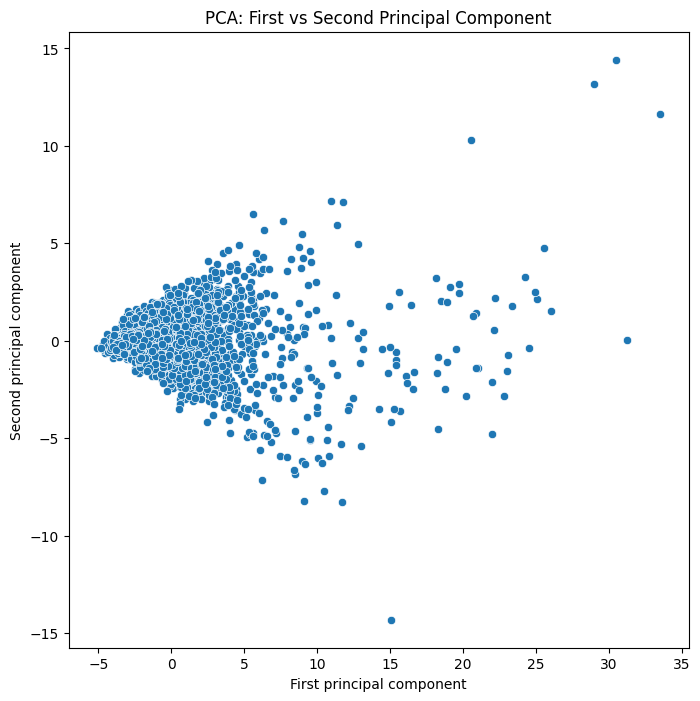

In [6]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # Scaling the training data

# PCA
pca = PCA(n_components=2)  # We only need the first two components for plotting
X_pca = pca.fit_transform(X_scaled)

# Plot the first vs second principal component
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette='viridis')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA: First vs Second Principal Component")
plt.show()


## Scaling & PCA

In [8]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # Scaling the training data
X_train_scaled = scaler.transform(X_train)  # Scaling the training data
X_test_scaled = scaler.transform(X_test)  # Scaling the test data

# PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

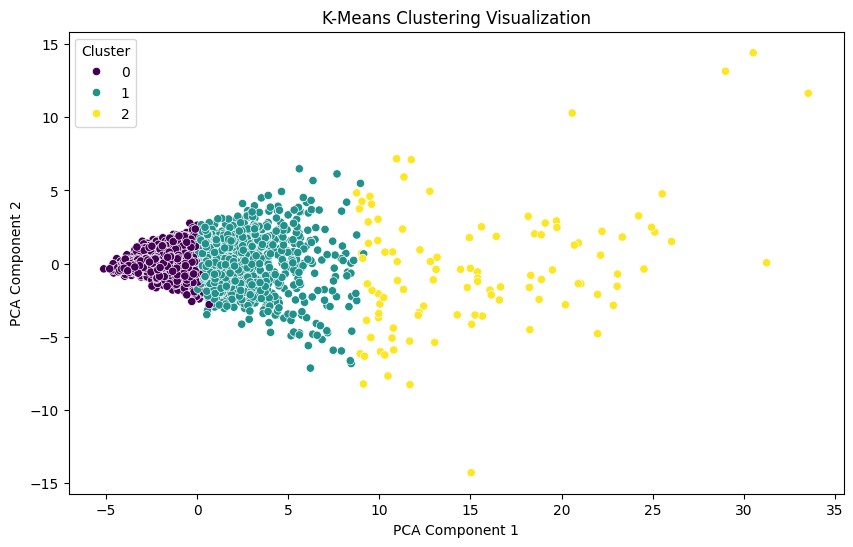

In [9]:
#Kmeans clustering


# --- Apply K-Means Clustering ---


#-TO DO: Experiment with other numbers for clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# --- Plot the K-Means Clusters ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("K-Means Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()




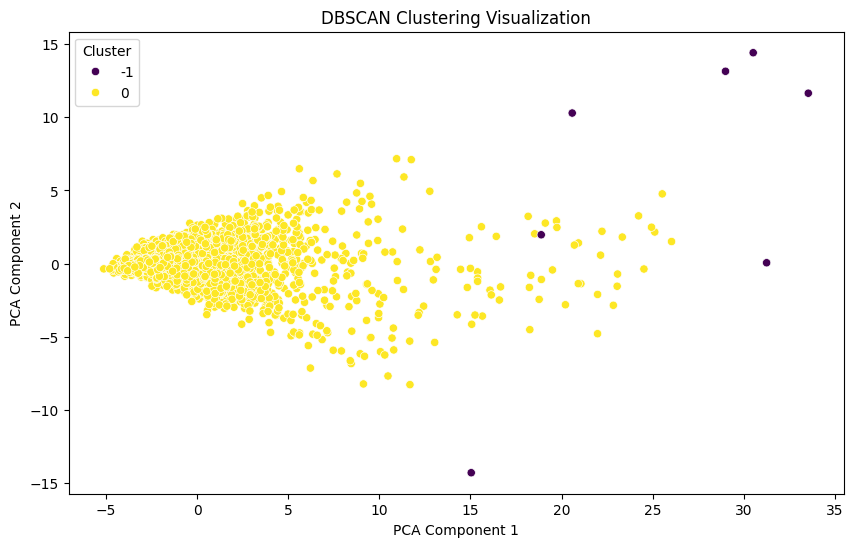

In [10]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=4.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)

# --- Plot the DBSCAN Clusters ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette="viridis")
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

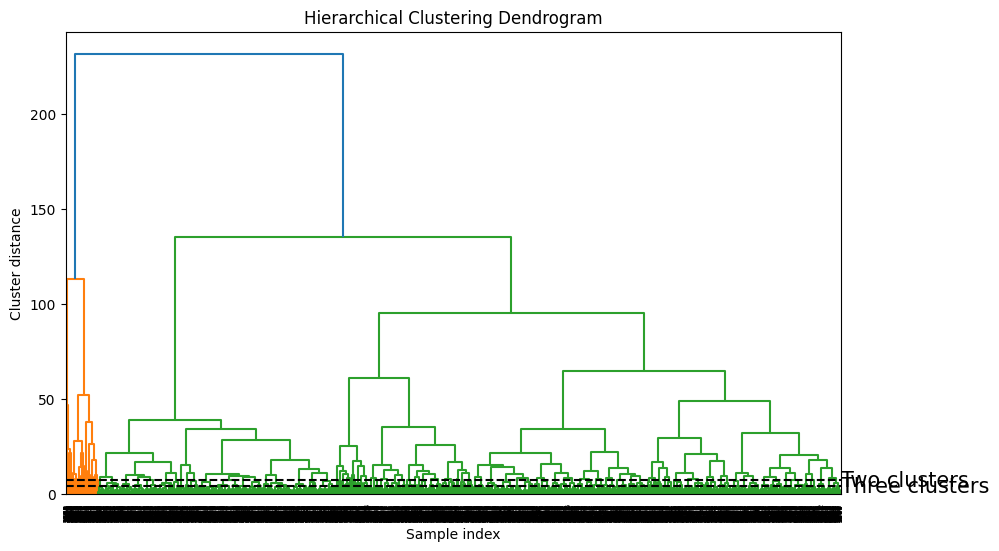

In [11]:
# --- Apply Hierarchical Clustering using Ward method ---
linkage_array = ward(X_scaled)

# --- Plot the Hierarchical Clustering Dendrogram ---
plt.figure(figsize=(10, 6))
dendrogram(linkage_array)

# Mark the cuts in the dendrogram for 2 and 3 clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')  # Mark cut for 2 clusters
ax.plot(bounds, [4, 4], '--', c='k')  # Mark cut for 3 clusters

# Add text annotations
ax.text(bounds[1], 7.25, 'Two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, 'Three clusters', va='center', fontdict={'size': 15})

# Customize plot
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

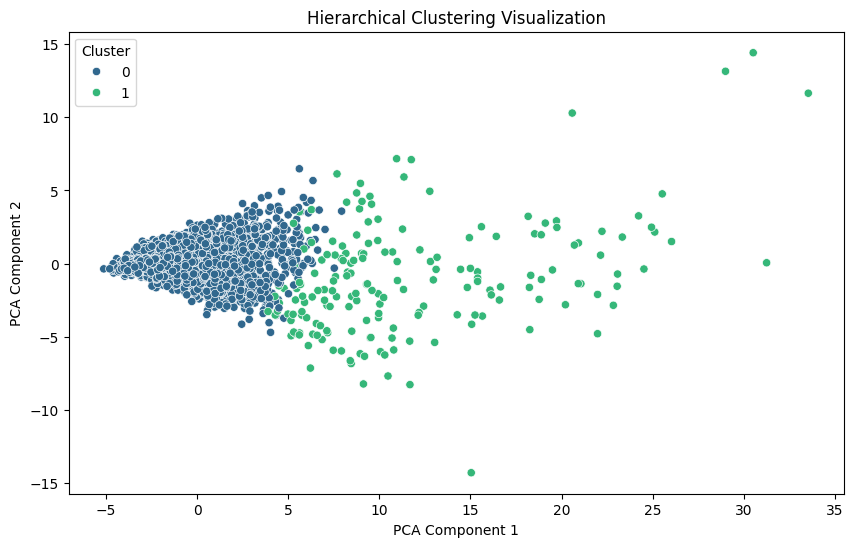

In [12]:
#agglomerative clustering


hierarchical = AgglomerativeClustering(linkage='ward')
agglo_result = hierarchical.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_result, palette="viridis")
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
#### Linear regression

In [13]:
linearRegression = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
print("Linear Regression")
print("Training set score: {:.3f}".format(linearRegression.score(X_train, y_train))) #R² score for training set
print("Test set score/R^2: {:.3f}".format(linearRegression.score(X_test, y_test)))  #R² score for test set
print("Linear Regression coefficients:", linearRegression.coef_) #prints coefficients of linear regression model. Coefficients represent weights assigned to features in the model.
print("Linear Regression intercept:", linearRegression.intercept_) #baseline prediction for the model. value of target variable when eveything else is 0


print("\nLasso Regression")
lasso = sklearn.linear_model.Lasso(alpha=0.001, max_iter=10000).fit(X_train, y_train)
print("lasso Training set score: {:.3f}".format(lasso.score(X_train, y_train))) #R² score for training set
print("lasso Test set score/R^2: {:.3f}".format(lasso.score(X_test, y_test)))#R² score for test set
print("lasso Number of features used:", np.sum(lasso.coef_ != 0))
print("lasso Coefficients:",lasso.coef_)



print("\nRidge Regression")
# Ridge regression with alpha=0.001
ridge = sklearn.linear_model.Ridge(alpha=0.001).fit(X_train, y_train)
print("ridge Training set score: {:.3f}".format(ridge.score(X_train, y_train))) #R² score for training set
print("ridge Test set score: {:.3f}".format(ridge.score(X_test, y_test)))#R² score for test set



Linear Regression
Training set score: 0.161
Test set score/R^2: 0.148
Linear Regression coefficients: [[ 3.08042729e-01 -6.18287036e+01 -3.27848060e+04 -5.92570082e+03
  -1.35679658e+02  2.19674430e+03  9.07632770e+01 -7.83398094e+00
  -1.35485857e+04 -4.06926519e+01  7.64722364e+01  4.45272036e+03
  -2.33266410e+01 -5.90990578e-01  6.03830367e+00 -3.20027345e+01
   1.69235663e+01]]
Linear Regression intercept: [38.16770504]

Lasso Regression
lasso Training set score: 0.158
lasso Test set score/R^2: 0.147
lasso Number of features used: 10
lasso Coefficients: [  0.31144408   0.          -0.           0.           0.
  30.15353065   0.          -2.3092152   -0.          -0.
  46.8646253  -40.48962162 -21.33964386  -0.59654999   4.35331245
 -32.06988035  14.15650023]

Ridge Regression
ridge Training set score: 0.160
ridge Test set score: 0.147


In [ ]:
# Decision Tree

In [14]:
tree = sklearn.tree.DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.615
Accuracy on test set: 0.557


In [15]:
X_train.head(3)

,age,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
1041,72,0.00531,0.000055,0.00178,0.00238,0.00534,0.02864,0.267,0.01396,0.01624,0.02182,0.04187,0.021833,20.626,0.70845,0.60337,0.23560
4727,71,0.00495,0.000036,0.00224,0.00291,0.00671,0.02589,0.228,0.01341,0.01635,0.02180,0.04023,0.007720,22.305,0.42067,0.74879,0.24196
4822,71,0.00516,0.000033,0.00245,0.00293,0.00736,0.04069,0.374,0.02093,0.02582,0.03197,0.06280,0.015832,19.644,0.47005,0.69337,0.24513


In [16]:
y_train.head(3)


,total_UPDRS
1041,23.308
4727,54.630
4822,53.917


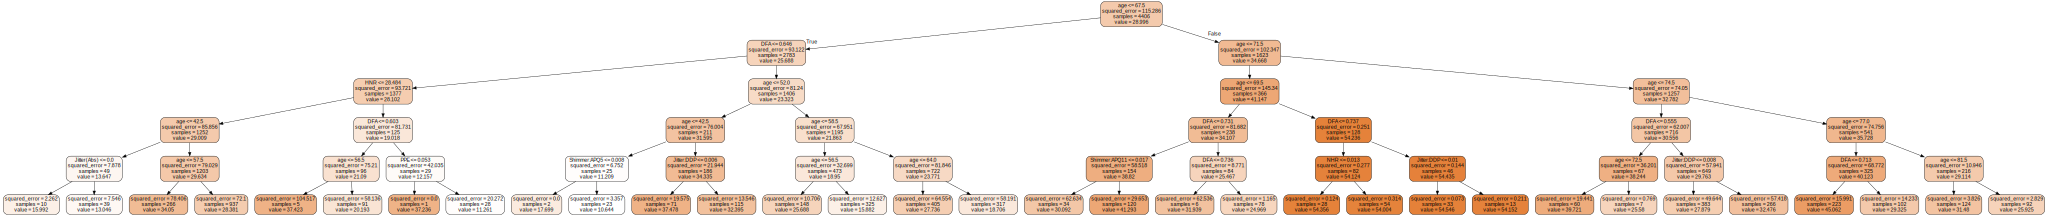

In [17]:
#Show the decision tree

dot_data = sklearn.tree.export_graphviz(
    tree,
    feature_names=X.columns,
    filled=True,
    rounded=True
)
graph = graphviz.Source(dot_data)
graph


In [18]:
# Gradient Boosted Regression Trees
gradientBoosted = sklearn.ensemble.GradientBoostingRegressor(random_state=42).fit(X_train, y_train.to_numpy().ravel())
test_r2 = gradientBoosted.score(X_test, y_test.to_numpy().ravel())
train_r2 = gradientBoosted.score(X_train, y_train.to_numpy().ravel())
print("R2 score on test set: {:.3f}".format(test_r2))
print("R2 score on training set: {:.3f}".format(train_r2))


R2 score on test set: 0.761
R2 score on training set: 0.800


R2 score for Linear Regression on test set: 0.148
R2 score for Linear Regression on train set: 0.161


<function matplotlib.pyplot.show(close=None, block=None)>

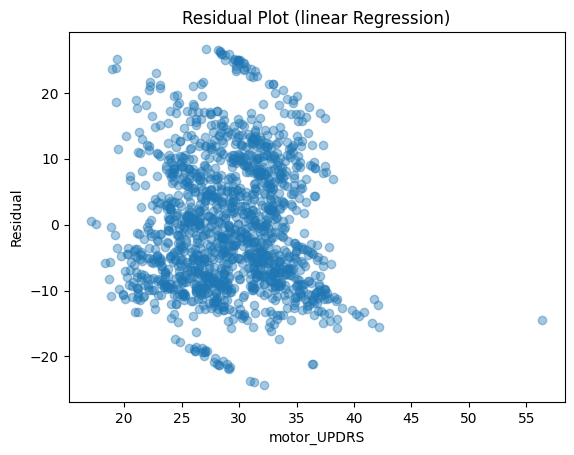

In [19]:
from sklearn.linear_model import LinearRegression

# Fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = lr.predict(X_test)

# Calculate the R^2 score for the test set
r2_score_test = lr.score(X_test, y_test)
r2_score_train = lr.score(X_train, y_train)
print("R2 score for Linear Regression on test set: {:.3f}".format(r2_score_test))
print("R2 score for Linear Regression on train set: {:.3f}".format(r2_score_train))

#Plot the residuals
#Residuals are plotted against the target variable
#If linear regression model is a good fit, there should be random scatter plots around zero
plt.scatter(y_pred,y_test - y_pred, alpha=0.4)
plt.xlabel("motor_UPDRS")
plt.ylabel("Residual")
plt.title ("Residual Plot (linear Regression)")
plt.show


#calculate the accuracy of

In [20]:
#Shuffle split
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(LinearRegression(), parkinsonsData.drop(columns=['total_UPDRS']), parkinsonsData['total_UPDRS'], cv=shuffle_split)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.90849345 0.90882648 0.90905036 0.90672904 0.90726983 0.90551782
 0.90567723 0.908919   0.91008986 0.91271473]


In [21]:
#Leave-One-Out Cross-Validation
scores = cross_val_score(LinearRegression(), parkinsonsData.drop(columns=['total_UPDRS']), parkinsonsData['total_UPDRS'], cv= LeaveOneOut(), scoring='neg_mean_squared_error')
print("Cross-validation MSE scores:", scores)
print("Mean MSE score:", scores.mean())


Cross-validation MSE scores: [-11.72093153  -6.86239721  -5.77991135 ...  -2.75932065  -1.36856971
  -1.11261326]
Mean MSE score: -10.412589882768604


In [22]:
#K-Fold Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(LinearRegression(), parkinsonsData.drop(columns=['total_UPDRS']), parkinsonsData['total_UPDRS'],cv=kfold)
print("Cross-validation scores with K-Fold:", scores)


Cross-validation scores with K-Fold: [0.91715695 0.91062621 0.90218812 0.90084801 0.9093456  0.9147861
 0.91223705 0.91550485 0.90370356 0.90326448]


## Hyperparameters Tuning

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

In [26]:
# Define Models and Hyperparameter Grids
models_params = {
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    }),
    'LinearRegression': (LinearRegression(), {}),  # No hyperparameters
    'Lasso': (Lasso(), {
        'alpha': [0.001, 0.01, 0.1, 1, 10]
    }),
    'Ridge': (Ridge(), {
        'alpha': [0.01, 0.1, 1, 10, 100]
    })
}

# Run Grid Search for Each Model
best_models = {}
for model_name, (model, params) in models_params.items():
    if params:  # Skip GridSearch for Linear Regression (no hyperparameters)
        grid_search = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"{model_name}: Best Parameters: {grid_search.best_params_}")
    else:
        best_models[model_name] = model.fit(X_train, y_train)

# Evaluate Models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}: Test R² Score: {r2:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor: Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
DecisionTreeRegressor: Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Lasso: Best Parameters: {'alpha': 0.001}
Ridge: Best Parameters: {'alpha': 0.01}
GradientBoostingRegressor: Test R² Score: 0.8867
DecisionTreeRegressor: Test R² Score: 0.8272
LinearRegression: Test R² Score: 0.1479
Lasso: Test R² Score: 0.1471
Ridge: Test R² Score: 0.1477
